In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import mode
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
suicide_rates_full = pd.read_csv("suicide_rates_no_na.csv")
display(suicide_rates_full.head())
suicides = pd.read_csv("us_suicides_merged.csv")
suicides.head()

,HDI for year,age,country,country-year,gdp_per_capita ($),generation,population,sex,suicides/100k pop,suicides_no,year,gdp_for_year ($)
0,0.841,75+ years,United States,United States1985,19693,G.I. Generation,4064000,male,53.57,2177,1985,4346734000000
1,0.841,55-74 years,United States,United States1985,19693,G.I. Generation,17971000,male,29.50,5302,1985,4346734000000
2,0.841,25-34 years,United States,United States1985,19693,Boomers,20986000,male,24.46,5134,1985,4346734000000
3,0.841,35-54 years,United States,United States1985,19693,Silent,26589000,male,22.77,6053,1985,4346734000000
4,0.841,15-24 years,United States,United States1985,19693,Generation X,19962000,male,21.38,4267,1985,4346734000000


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,depression_percentage,drug_death_rate
0,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,4346734000000,19693,Generation X,NaN,NaN
1,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4346734000000,19693,Generation X,NaN,NaN
2,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,4346734000000,19693,Boomers,NaN,NaN
3,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4346734000000,19693,Boomers,NaN,NaN
4,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,4346734000000,19693,Silent,NaN,NaN


In [105]:
suicides_us = suicide_rates_full[suicide_rates_full["country"] == "United States"]
suicides_us = suicides_us[['country','year','sex','age','suicides_no','population','suicides/100k pop','country-year','HDI for year','gdp_for_year ($)','gdp_per_capita ($)','generation']]
suicides_us.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,4346734000000,19693,G.I. Generation
1,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,4346734000000,19693,G.I. Generation
2,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4346734000000,19693,Boomers
3,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,4346734000000,19693,Silent
4,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4346734000000,19693,Generation X


In [107]:
depression = pd.read_csv("intermediate_data/depression_percentage.csv")
display(depression)
drug_male = pd.read_csv("intermediate_data/drug_male_by_age.csv")
display(drug_male)
drug_female = pd.read_csv("intermediate_data/drug_female_by_age.csv")
display(drug_female)

,Year,male,female
0,1990,3.53,5.75
1,1991,3.52,5.73
2,1992,3.51,5.72
3,1993,3.51,5.72
4,1994,3.51,5.73
5,1995,3.51,5.73
6,1996,3.51,5.75
7,1997,3.52,5.80
8,1998,3.52,5.86
9,1999,3.53,5.92


,age,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,5-14 years,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,0.2,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2
1,15-24 years,4.5,5.3,6.1,7.3,8.8,9.6,10.0,12.0,12.0,11.9,11.3,11.6,12.4,11.4,11.7,12.1,13.3,17.5,17.1
2,25-34 years,11.5,11.3,12.0,14.7,15.7,16.6,18.7,22.7,23.4,23.6,24.0,25.0,27.5,27.0,28.6,31.9,37.9,48.9,54.3
3,35-54 years,34.4,35.2,37.6,43.7,46.9,47.6,50.2,57.2,55.9,55.2,54.3,53.4,57.2,57.5,59.6,63.7,71.6,89.4,101.3
4,55-74 years,7.6,6.5,8.0,9.6,10.7,11.5,13.9,15.8,18.4,19.6,20.8,21.8,23.9,25.6,29.6,30.8,34.7,42.2,48.0
5,75+ years,6.9,8.4,6.2,8.8,7.7,7.6,8.6,7.9,8.1,7.6,8.7,8.7,7.7,8.5,9.6,8.1,8.9,8.3,8.2


,age,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,5-14 years,0.1,0.1,0.1,0.2,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,0.3
1,15-24 years,1.8,1.9,2.2,2.8,3.1,3.3,3.5,3.9,4.2,4.0,4.1,4.6,4.6,4.4,4.8,5.0,5.9,7.0,7.9
2,25-34 years,4.6,4.6,5.2,6.2,7.1,7.2,8.5,9.5,10.1,9.9,10.4,11.9,12.8,13.1,13.0,14.1,15.7,19.9,22.0
3,35-54 years,15.9,16.9,19.5,25.0,27.2,29.8,31.3,34.5,37.1,37.5,37.8,38.6,41.3,40.5,41.6,42.9,45.4,50.0,52.6
4,55-74 years,5.6,5.9,6.4,8.0,9.0,10.0,10.6,12.4,14.2,15.5,16.2,17.7,18.8,19.5,21.8,23.7,23.7,26.0,27.3
5,75+ years,6.5,6.2,6.1,6.5,6.4,6.6,6.6,7.5,7.5,7.3,7.8,7.8,7.6,7.3,6.9,7.5,7.4,6.8,7.3


In [13]:
drug_agg = pd.read_csv("intermediate_data/drug_aggregate.csv")
drug_agg = drug_agg[['year', 'drug_death_rate']]
drug_agg['year'] = drug_agg.year.astype(int)
drug_agg['drug_death_rate'] = drug_agg.drug_death_rate.astype(float)
drug_agg.head()

,year,drug_death_rate
0,1950,2.5
1,1960,1.7
2,1970,2.8
3,1980,1.9
4,1990,2.3


In [115]:
depression_melted = depression.melt(id_vars=['Year'], var_name='sex', value_name='depression_percentage')
depression_melted['year'] = depression_melted['Year']
depression_melted.drop("Year", axis=1, inplace=True)
depression_melted.head()

,sex,depression_percentage,year
0,male,3.53,1990
1,male,3.52,1991
2,male,3.51,1992
3,male,3.51,1993
4,male,3.51,1994


In [32]:
non_na_depression = suicides[suicides['depression_percentage'].notnull()][["year", "age", "sex", "depression_percentage"]]
non_na_depression.head()

,year,age,sex,depression_percentage
60,1990,15-24 years,female,5.75
61,1990,15-24 years,male,3.53
62,1990,25-34 years,female,5.75
63,1990,25-34 years,male,3.53
64,1990,35-54 years,female,5.75


FOR MALES


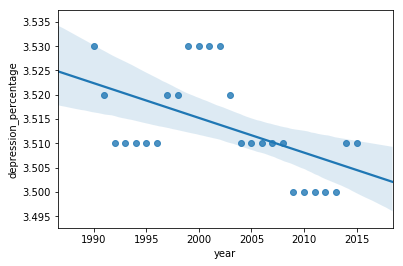

FOR FEMALES


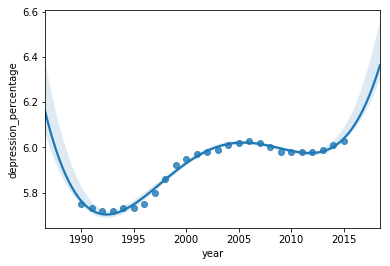

In [55]:
#depression is by gender
temp = non_na_depression[non_na_depression['age'] == '15-24 years']
for gender in ["male", "female"]:
    temp2 = temp[temp["sex"] == gender]
    print("FOR " + gender.upper() + "S")
    if gender == 'male':
        sns.regplot(x="year", y="depression_percentage", data=temp2, order=1)
    else:
        sns.regplot(x="year", y="depression_percentage", data=temp2, order=4)
    plt.show()

,year,sex,depression_percentage
0,1985,male,3.520442
1,1986,male,3.520368
2,1987,male,3.518640
3,1988,male,3.517200
4,1989,male,3.516000


/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



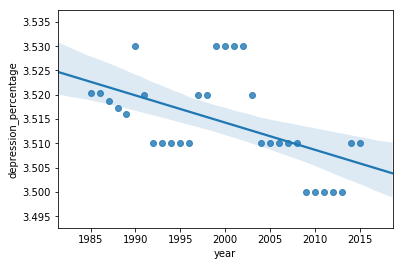

In [96]:
#filling nas for male depression rate
def use_last_five(to_fill, existing_vals):
    vals = []
    for i in to_fill[::-1]:
        average = np.mean([existing_vals[i+j] for j in range(1, 6)])
        existing_vals[i] = average
        vals.insert(0, average)
    return vals

dep_male_to_fill = list(range(1985, 1990))
temp2 = temp[temp["sex"] == 'male']
existing_vals = {}
for year in range(1990, 1995):
    existing_vals[year] = temp2[temp2['year'] == year].iloc[0, 3]
male_dep_vals = use_last_five(dep_male_to_fill, existing_vals)
male_dep_nas = pd.DataFrame.from_dict({'year':dep_to_fill, 'depression_percentage':male_dep_vals})
male_dep_nas['sex'] = ['male'] * len(male_dep_nas)
male_dep_nas = male_dep_nas[['year', 'sex', 'depression_percentage']]
display(male_dep_nas)
sns.regplot(x="year", y="depression_percentage", data=pd.concat([temp2, male_dep_nas]), order=1)

In [116]:
depression_melted_male = pd.concat([depression_melted[depression_melted['sex'] == 'male'], male_dep_nas]).reset_index(drop=True)
depression_melted_male.head()

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,depression_percentage,sex,year
0,3.53,male,1990
1,3.52,male,1991
2,3.51,male,1992
3,3.51,male,1993
4,3.51,male,1994


,year,sex,depression_percentage
0,1985,female,6.519361
1,1986,female,6.274631
2,1987,female,6.083289
3,1988,female,5.938572
4,1989,female,5.834123


/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



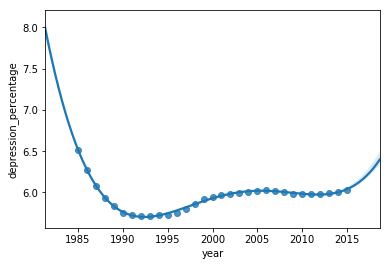

In [101]:
#filling nas for female depression rate
def coeff_to_vals(to_fill, coeffs):
    vals = []
    for i in to_fill:
        power = len(coeffs) - 1
        intermediate_sum = 0
        for coeff in coeffs:
            intermediate_sum += i**power * coeff
            power -= 1
        vals.append(intermediate_sum)
    return vals
dep_to_fill = list(range(1985, 1990))
temp2 = temp[temp["sex"] == 'female']
female_dep_coeffs = np.polyfit(temp2['year'], temp2['depression_percentage'], 4)
female_dep_vals = coeff_to_vals(dep_to_fill, female_dep_coeffs)
female_dep_nas = pd.DataFrame.from_dict({'year':dep_to_fill, 'depression_percentage':female_dep_vals})
female_dep_nas['sex'] = ['female'] * len(female_dep_nas)
female_dep_nas = female_dep_nas[['year', 'sex', 'depression_percentage']]
display(female_dep_nas)
sns.regplot(x="year", y="depression_percentage", data=pd.concat([temp2, female_dep_nas]), order=4)

In [117]:
depression_melted_female = pd.concat([depression_melted[depression_melted['sex'] == 'female'], female_dep_nas]).reset_index(drop=True)
depression_melted_female.head()

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,depression_percentage,sex,year
0,5.75,female,1990
1,5.73,female,1991
2,5.72,female,1992
3,5.72,female,1993
4,5.73,female,1994


In [113]:
#merge depression by gender and year
dep = pd.merge(suicides_us, pd.concat([depression_melted_female, depression_melted_male]), on=['year', 'sex'], how='left')
dep.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,depression_percentage
0,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,4346734000000,19693,G.I. Generation,3.520442
1,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,4346734000000,19693,G.I. Generation,3.520442
2,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4346734000000,19693,Boomers,3.520442
3,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,4346734000000,19693,Silent,3.520442
4,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4346734000000,19693,Generation X,3.520442


In [114]:
dep.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year             0
gdp_for_year ($)         0
gdp_per_capita ($)       0
generation               0
depression_percentage    0
dtype: int64

In [34]:
non_na_drugs = suicides[suicides['drug_death_rate'].notnull()][["year", "age", "sex", "drug_death_rate"]]
non_na_drugs.head()

,year,age,sex,drug_death_rate
168,1999,15-24 years,female,1.8
169,1999,15-24 years,male,4.5
170,1999,25-34 years,female,4.6
171,1999,25-34 years,male,11.5
172,1999,35-54 years,female,15.9


For age group: 15-24 years


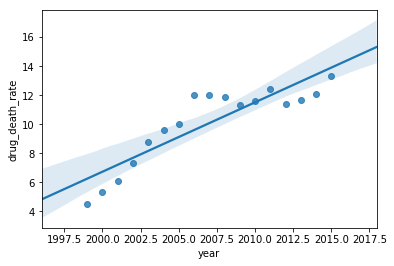

For age group: 25-34 years


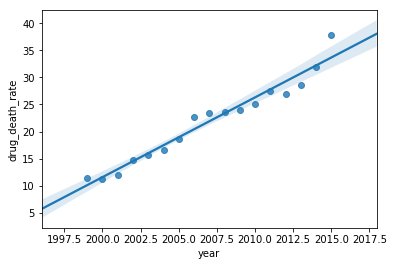

For age group: 35-54 years


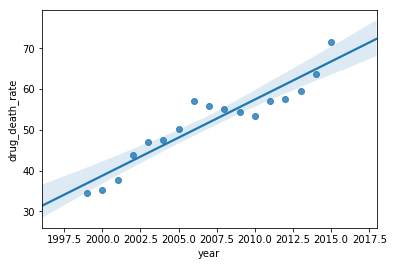

For age group: 5-14 years


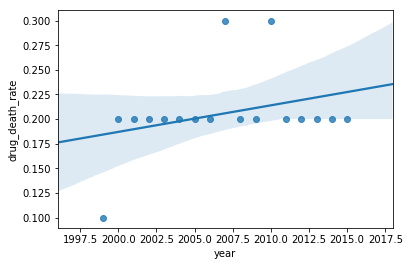

For age group: 55-74 years


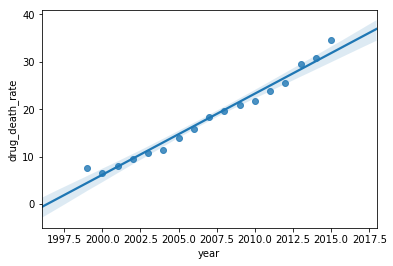

For age group: 75+ years


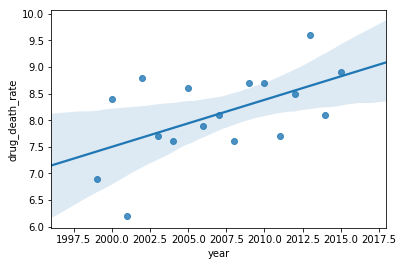

In [40]:
#drugs is by age group and gender
temp = non_na_drugs[non_na_drugs['sex'] == 'male']
for i in non_na_drugs.age.unique():
    temp2 = temp[temp["age"] == i]
    print("For age group: " + i)
    sns.regplot(x="year", y="drug_death_rate", data=temp2)
    plt.show()

In [119]:
non_na_drugs.age.unique()

array(['15-24 years', '25-34 years', '35-54 years', '5-14 years',
       '55-74 years', '75+ years'], dtype=object)

In [150]:
temp = non_na_drugs[non_na_drugs['sex'] == 'male']
temp2 = temp[temp["age"] == '75+ years']
temp2[temp2['year'] == 1998]
sns.regplot("year", "drug_death_rate", data=temp2, order=2)

,year,age,sex,drug_death_rate


In [163]:
#filling nas for male drug death rate – each year is a column and each row is an age group
temp = non_na_drugs[non_na_drugs['sex'] == 'male']
cop = drug_male.copy().set_index("age")
for year in reversed(range(1985, 1999)):
    vals = []
    #age 5-14
    temp2 = temp[temp["age"] == '5-14 years']
    vals.append(mode(temp2.drug_death_rate))
    #age 15-24
    temp2 = temp[temp["age"] == '15-24 years']
    male_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], male_drug_coeffs)[0], 0))
    #age 25-34
    temp2 = temp[temp["age"] == '25-34 years']
    male_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], male_drug_coeffs)[0], 0))
    #age 35-54
    temp2 = temp[temp["age"] == '35-54 years']
    male_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], male_drug_coeffs)[0], 0))
    #age 55-74
    temp2 = temp[temp["age"] == '55-74 years']
    male_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], male_drug_coeffs)[0], 0))
    #age 75+
    temp2 = temp[temp["age"] == '75+ years']
    existing_vals = {}
    for i in range(year+1, year+6):
        existing_vals[i] = cop.loc['75+ years', str(i)]
    vals.append(max(use_last_five([year], existing_vals)[0], 0))
    cop[str(year)] = vals
cop

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
age,,,,,,,,,,,,,,,,,,,,,
5-14 years,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.3,0.2,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
15-24 years,4.5,5.3,6.1,7.3,8.8,9.6,10.0,12.0,12.0,11.9,...,3.863235,3.385294,2.907353,2.429412,1.951471,1.473529,0.995588,0.517647,0.039706,0.000000
25-34 years,11.5,11.3,12.0,14.7,15.7,16.6,18.7,22.7,23.4,23.6,...,2.757843,1.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35-54 years,34.4,35.2,37.6,43.7,46.9,47.6,50.2,57.2,55.9,55.2,...,27.527206,25.657353,23.787500,21.917647,20.047794,18.177941,16.308088,14.438235,12.568382,10.698529
55-74 years,7.6,6.5,8.0,9.6,10.7,11.5,13.9,15.8,18.4,19.6,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75+ years,6.9,8.4,6.2,8.8,7.7,7.6,8.6,7.9,8.1,7.6,...,7.395840,7.495008,7.474010,7.452812,7.476174,7.458769,7.471354,7.466624,7.465146,7.467613


For age group: 15-24 years


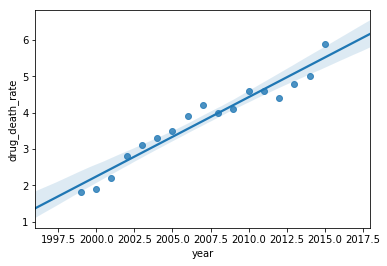

For age group: 25-34 years


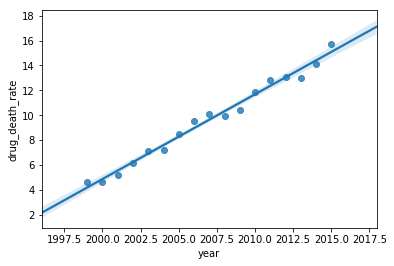

For age group: 35-54 years


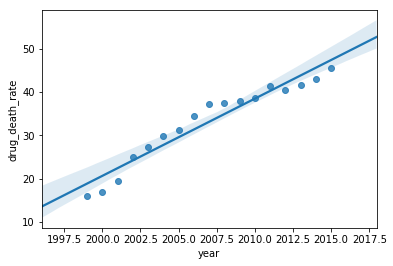

For age group: 5-14 years


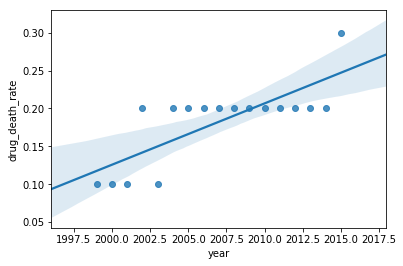

For age group: 55-74 years


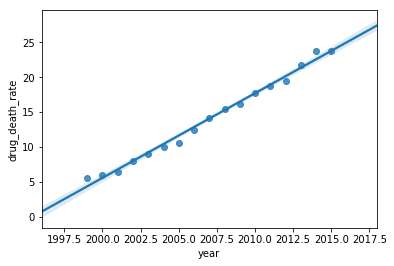

For age group: 75+ years


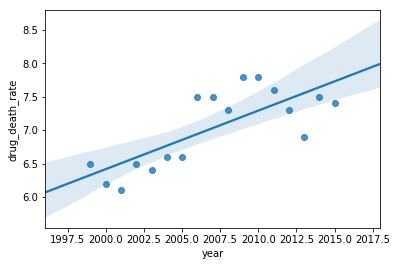

In [118]:
#drugs is by age group and gender
temp = non_na_drugs[non_na_drugs['sex'] == 'female']
for i in non_na_drugs.age.unique():
    temp2 = temp[temp["age"] == i]
    print("For age group: " + i)
    sns.regplot(x="year", y="drug_death_rate", data=temp2)
    plt.show()

In [164]:
#filling nas for male drug death rate – each year is a column and each row is an age group
temp = non_na_drugs[non_na_drugs['sex'] == 'female']
cop_female = drug_female.copy().set_index("age")
for year in reversed(range(1985, 1999)):
    vals = []
    #age 5-14
    temp2 = temp[temp["age"] == '5-14 years']
    vals.append(mode(temp2.drug_death_rate))
    #age 15-24
    temp2 = temp[temp["age"] == '15-24 years']
    female_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], female_drug_coeffs)[0], 0))
    #age 25-34
    temp2 = temp[temp["age"] == '25-34 years']
    female_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], female_drug_coeffs)[0], 0))
    #age 35-54
    temp2 = temp[temp["age"] == '35-54 years']
    female_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], female_drug_coeffs)[0], 0))
    #age 55-74
    temp2 = temp[temp["age"] == '55-74 years']
    female_drug_coeffs = np.polyfit(temp2['year'], temp2['drug_death_rate'], 1)
    vals.append(max(coeff_to_vals([year], female_drug_coeffs)[0], 0))
    #age 75+
    temp2 = temp[temp["age"] == '75+ years']
    existing_vals = {}
    for i in range(year+1, year+6):
        existing_vals[i] = cop.loc['75+ years', str(i)]
    vals.append(max(use_last_five([year], existing_vals)[0], 0))
    cop_female[str(year)] = vals
cop_female

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
age,,,,,,,,,,,,,,,,,,,,,
5-14 years,0.1,0.1,0.1,0.2,0.1,0.2,0.2,0.2,0.2,0.2,...,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000,0.200000
15-24 years,1.8,1.9,2.2,2.8,3.1,3.3,3.5,3.9,4.2,4.0,...,0.925245,0.706373,0.487500,0.268627,0.049755,0.000000,0.000000,0.000000,0.000000,0.000000
25-34 years,4.6,4.6,5.2,6.2,7.1,7.2,8.5,9.5,10.1,9.9,...,0.792892,0.112255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35-54 years,15.9,16.9,19.5,25.0,27.2,29.8,31.3,34.5,37.1,37.5,...,9.944853,8.163235,6.381618,4.600000,2.818382,1.036765,0.000000,0.000000,0.000000,0.000000
55-74 years,5.6,5.9,6.4,8.0,9.0,10.0,10.6,12.4,14.2,15.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75+ years,6.5,6.2,6.1,6.5,6.4,6.6,6.6,7.5,7.5,7.3,...,7.395840,7.495008,7.474010,7.452812,7.476174,7.458769,7.471354,7.466624,7.465146,7.467613


In [170]:
drug_male_melt = cop.reset_index().melt(id_vars=['age'], var_name='year', value_name='drug_death_rate')
drug_male_melt['sex'] = ['male']*len(drug_male_melt)
drug_male_melt.tail(20)

,age,year,drug_death_rate,sex
178,55-74 years,1988,0.000000,male
179,75+ years,1988,7.471354,male
180,5-14 years,1987,0.200000,male
181,15-24 years,1987,0.517647,male
182,25-34 years,1987,0.000000,male
183,35-54 years,1987,14.438235,male
184,55-74 years,1987,0.000000,male
185,75+ years,1987,7.466624,male
186,5-14 years,1986,0.200000,male
187,15-24 years,1986,0.039706,male


In [169]:
drug_female_melt = cop_female.reset_index().melt(id_vars=['age'], var_name='year', value_name='drug_death_rate')
drug_female_melt['sex'] = ['female']*len(drug_female_melt)
drug_female_melt.tail(20)

,age,year,drug_death_rate,sex
178,55-74 years,1988,0.000000,female
179,75+ years,1988,7.471354,female
180,5-14 years,1987,0.200000,female
181,15-24 years,1987,0.000000,female
182,25-34 years,1987,0.000000,female
183,35-54 years,1987,0.000000,female
184,55-74 years,1987,0.000000,female
185,75+ years,1987,7.466624,female
186,5-14 years,1986,0.200000,female
187,15-24 years,1986,0.000000,female


In [171]:
drugs = pd.concat([drug_male_melt, drug_female_melt])
drugs.head()

,age,year,drug_death_rate,sex
0,5-14 years,1999,0.1,male
1,15-24 years,1999,4.5,male
2,25-34 years,1999,11.5,male
3,35-54 years,1999,34.4,male
4,55-74 years,1999,7.6,male


In [172]:
# drugs.reset_index(drop=True, inplace=True)
# drugs['year'] = drugs.year.astype(int)

In [173]:
full_merge = pd.merge(dep, drugs, on = ['year', 'age', 'sex'], how="left")
full_merge.sort_values(["year", "age", "sex"], inplace=True)
full_merge

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,depression_percentage,drug_death_rate
9,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,4346734000000,19693,Generation X,6.519361,0.000000
4,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4346734000000,19693,Generation X,3.520442,0.000000
8,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,4346734000000,19693,Boomers,6.519361,0.000000
2,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4346734000000,19693,Boomers,3.520442,0.000000
5,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,4346734000000,19693,Silent,6.519361,0.000000
3,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,4346734000000,19693,Silent,3.520442,10.698529
11,United States,1985,female,5-14 years,73,16553000,0.44,United States1985,0.841,4346734000000,19693,Generation X,6.519361,0.200000
10,United States,1985,male,5-14 years,205,17370000,1.18,United States1985,0.841,4346734000000,19693,Generation X,3.520442,0.200000
6,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,4346734000000,19693,G.I. Generation,6.519361,0.000000
1,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,4346734000000,19693,G.I. Generation,3.520442,0.000000


In [174]:
full_merge.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year             0
gdp_for_year ($)         0
gdp_per_capita ($)       0
generation               0
depression_percentage    0
drug_death_rate          0
dtype: int64

In [175]:
full_merge.to_csv("us_suicides_merged_no_na.csv", index=False)

In [176]:
test = pd.read_csv("us_suicides_merged_no_na.csv")
test.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,depression_percentage,drug_death_rate
0,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,4346734000000,19693,Generation X,6.519361,0.0
1,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4346734000000,19693,Generation X,3.520442,0.0
2,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,4346734000000,19693,Boomers,6.519361,0.0
3,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4346734000000,19693,Boomers,3.520442,0.0
4,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,4346734000000,19693,Silent,6.519361,0.0
